<a href="https://colab.research.google.com/github/DanielSzarek/175IC-machine-learning/blob/main/zad%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import LocalOutlierFactor

sns.set(font_scale=1.2)
np.random.seed(26)

data = make_blobs(n_samples=300, cluster_std=2.0, random_state=10)[0]
data[:5]

tmp = pd.DataFrame(data=data, columns={'x1', 'x2'})
px.scatter(tmp, x='x1', y='x2', template='plotly_dark')

In [11]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, x='x1', y='x2', width=500, title='Outliers', nbinsx=20, nbinsy=20)
fig2 = px.scatter(tmp, x='x1', y='x2', width=500)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_layout(template='plotly_dark')
fig.show()

1


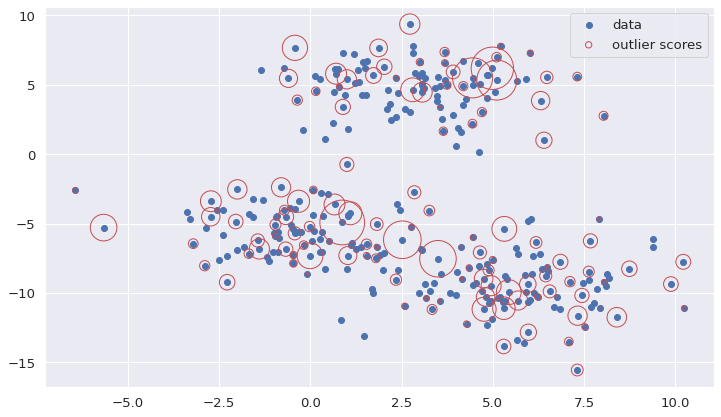

3


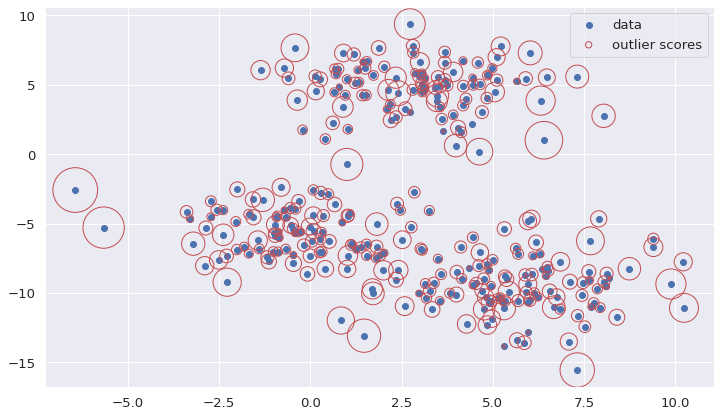

5


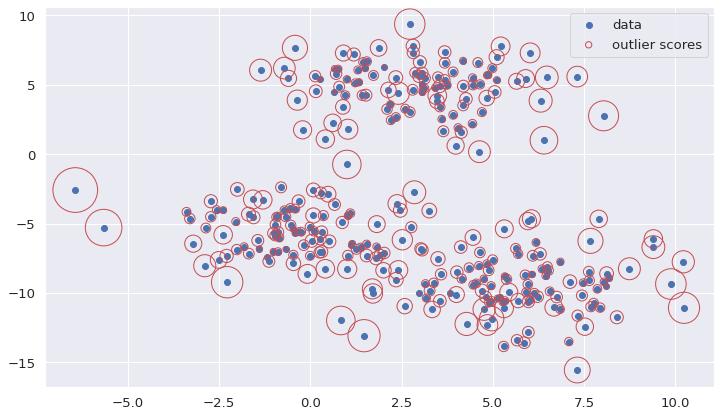

7


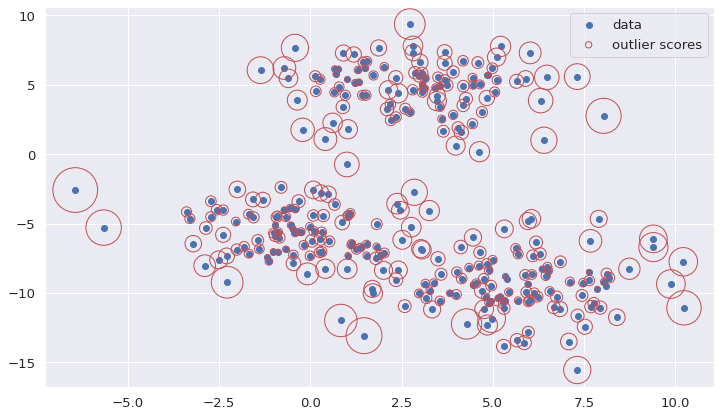

9


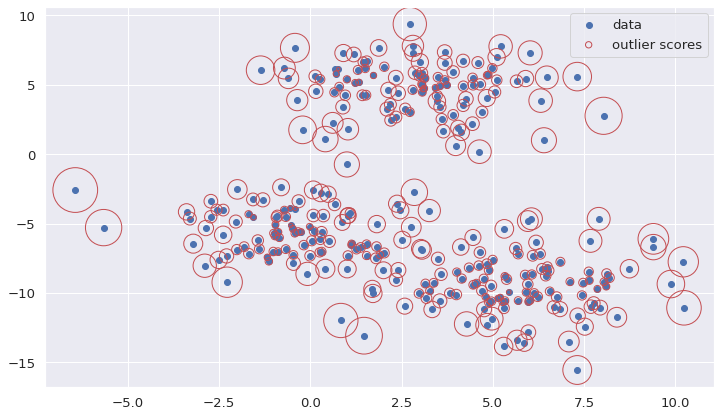

In [8]:
def lof_plot(neighbors):
  lof = LocalOutlierFactor(n_neighbors=neighbors)
  y_pred = lof.fit_predict(data)

  all_data = np.c_[data, y_pred]
  all_data[:5]

  tmp['y_pred'] = y_pred
  px.scatter(tmp, x='x1', y='x2', color='y_pred', template='plotly_dark')
  lof_scores = lof.negative_outlier_factor_
  radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())
  radius[:5]

  plt.figure(figsize=(12, 7))
  plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
  plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
  legend = plt.legend()
  legend.legendHandles[1]._sizes = [40]
  plt.show()

for n in range(1, 10, 2):
  print(n)
  lof_plot(n)